# RegPhos (Human) Data Formatting
This file takes data regarding human kinase-protein interactions from the RegPhos database and converts the data into the .gmt format. The data was retrieved from the RegPhos database on Wed, Jun 14 2017 15:24:15 as a .txt and was transferred to the excel format used on Wed, Jun 14 2017 15:39:54. This data will be added to enhance the KEA2 database and will be suitably formatted for use by ENRICHR and X2K.

## Import packages necessary for following program

In [88]:
%run /home/maayanlab/Projects/Scripts/init.ipy
%run /home/maayanlab/Projects/Scripts/Scripts.py

## Create a dataframe from a file containing Human RegPhos data

In [89]:
#Define column names as headers from original .txt file
colnames = ['ID', 'AC', 'position', 'decription', 
            'catalytic_kinase','reference', 'resource', 'code' ]

#read data from excel file into dataframe 'regphos_df'
regphos_df = pd.read_excel('~/Desktop/RegPhos_Phos_human.xlsm', 
                           header = None, names = colnames)

#drop all rows with an 'NaN' value for the kinases
regphos_df.dropna(axis = 0, inplace = True)

#View dataframe
regphos_df.head()

,ID,AC,position,decription,catalytic_kinase,reference,resource,code
0,IKKB_HUMAN,O14920,689,Phosphoserine,IKKb,10195894,HPRD 9.0,S
1,IKKB_HUMAN,O14920,689,Phosphoserine,IKK_group,10195894,PhosphoELM.10011,S
2,IKKB_HUMAN,O14920,692,Phosphoserine,IKKb,10195894,HPRD 9.0,S
3,IKKB_HUMAN,O14920,692,Phosphoserine,IKK_group,10195894,PhosphoELM.10011,S
4,IKKB_HUMAN,O14920,695,Phosphoserine,IKKb,10195894,HPRD 9.0,S


## Convert UniProt IDs to Gene Symbols

In [90]:
#Use uniprot_to_symbol function from Scripts.py to convert
regphos_df['target_symbol'] = Scripts.uniprot_to_symbol(regphos_df['AC'].tolist())

#View dataframe
regphos_df.head()

,ID,AC,position,decription,catalytic_kinase,reference,resource,code,target_symbol
0,IKKB_HUMAN,O14920,689,Phosphoserine,IKKb,10195894,HPRD 9.0,S,IKBKB
1,IKKB_HUMAN,O14920,689,Phosphoserine,IKK_group,10195894,PhosphoELM.10011,S,IKBKB
2,IKKB_HUMAN,O14920,692,Phosphoserine,IKKb,10195894,HPRD 9.0,S,IKBKB
3,IKKB_HUMAN,O14920,692,Phosphoserine,IKK_group,10195894,PhosphoELM.10011,S,IKBKB
4,IKKB_HUMAN,O14920,695,Phosphoserine,IKKb,10195894,HPRD 9.0,S,IKBKB


## Create a new column combining kinases and organism

In [91]:
# Combine 'kinases' and 'species' into one column 'kinase_organism'
regphos_df['kinase_organism'] = ['_'.join([str(kinase), 'Homo sapiens']) for kinase
                                in regphos_df.catalytic_kinase]

#View dataframe
regphos_df.head()

,ID,AC,position,decription,catalytic_kinase,reference,resource,code,target_symbol,kinase_organism
0,IKKB_HUMAN,O14920,689,Phosphoserine,IKKb,10195894,HPRD 9.0,S,IKBKB,IKKb_Homo sapiens
1,IKKB_HUMAN,O14920,689,Phosphoserine,IKK_group,10195894,PhosphoELM.10011,S,IKBKB,IKK_group_Homo sapiens
2,IKKB_HUMAN,O14920,692,Phosphoserine,IKKb,10195894,HPRD 9.0,S,IKBKB,IKKb_Homo sapiens
3,IKKB_HUMAN,O14920,692,Phosphoserine,IKK_group,10195894,PhosphoELM.10011,S,IKBKB,IKK_group_Homo sapiens
4,IKKB_HUMAN,O14920,695,Phosphoserine,IKKb,10195894,HPRD 9.0,S,IKBKB,IKKb_Homo sapiens


## Perform preliminary data processing
Select columns necessary for .gmt format and filter into new dataframe 'df' df = phospho_df[['acc', 'kinases', 'species']]We must drop duplicates and NaNs, as well as select only the columns necessary for the .gmt file format (the protein ids and kinase gene symbols). 

In [92]:
#select columns necessary for .gmt format and filter into new dataframe 'df'
df = regphos_df[['target_symbol', 'kinase_organism']]

#drop duplicate rows in the dataframe
df.drop_duplicates(inplace = True)

#drop all rows with an 'NaN' value for the kinases
df.dropna(axis = 0, inplace = True)

#Visualize data
df.head()

/home/maayanlab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/maayanlab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,target_symbol,kinase_organism
0,IKBKB,IKKb_Homo sapiens
1,IKBKB,IKK_group_Homo sapiens
17,CASK,autocatalysis_Homo sapiens
19,PLD2,EGFR_Homo sapiens
20,PLD2,PKCa_Homo sapiens


## Set Index to 'Kinase_Organism' and Aggregate Kinase Targets

In [93]:
df.set_index('kinase_organism')

#Group kinases in dataframe 'kin'
#Aggregate data in 'kin' according to kinase groups
kin = df.groupby('kinase_organism').agg(lambda x: tuple(x))

#Create a new column with 'RegPhos' as description of data
kin.insert(0, 'Description', 'RegPhos')

#Visualize Data
kin.head()

,Description,target_symbol
kinase_organism,,
AAK1_Homo sapiens,RegPhos,"(NUMB, AP2M1, AP1M1)"
ABL1(Abl)_Homo sapiens,RegPhos,"(TP73, PSTPIP1, ABL1, CAT, ANXA1)"
ABL2(ARG)_Homo sapiens,RegPhos,"(SIVA1, CAT)"
ABL_Homo sapiens,RegPhos,"(PLSCR1, CDKN1B, ROBO1)"
AKT1_Homo sapiens,RegPhos,"(CHUK, FOXO3, NUAK1, TBC1D4, RAF1, ITGB3, CREB..."


# Exploratory Data Analysis

## Calculate Number of Protein Targets for each kinase
Create a new column with the number of substrates related to each kinase, and sort the dataframe by this column

In [94]:
# Create column representing counts of protein targets per kinase
kin['kinase_targets_num'] = [len(lst) for kinase, lst in kin['target_symbol'].iteritems()]

# Sort kinases from max to min according to number of protein targets each has
kin.sort_values(by = ['kinase_targets_num'], ascending= False, inplace=True)

# Visualize data
kin.head()

,Description,target_symbol,kinase_targets_num
kinase_organism,,,
PKA_group_Homo sapiens,RegPhos,"(AURKA, PJA2, KCNQ2, RGS14, RGS10, ENSA, KCNJ1...",160
autocatalysis_Homo sapiens,RegPhos,"(CASK, PDPK1, DAPK3, MAP3K7, RIPK2, JAK2, RPS6...",116
SRC_Homo sapiens,RegPhos,"(PLSCR1, NPHP1, TP73, INPPL1, RGS16, PDPK1, SP...",105
PKC_group_Homo sapiens,RegPhos,"(PLSCR1, KCNJ13, ADAP1, PRKD3, RASGRP1, HAND1,...",102
CK2_group_Homo sapiens,RegPhos,"(KIF1C, VAMP4, C1R, TNF, VTN, MYCN, JUN, SSB, ...",84


## Create Histogram to display distribution of number of targets per kinase

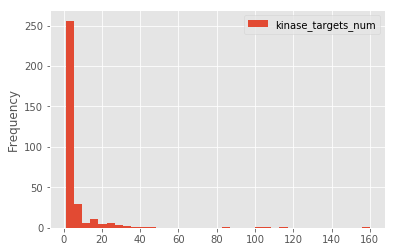

In [95]:
# Create histogram displaying the distribution of the number
#targets per kinase
kin.plot.hist(by = 'kinase_targets_num', bins = 37)

#Show histogram
plt.show()

# Creation of Final .GMT File

## Create Dictionary of Tab-Separated Rows of the Dataframe

In [96]:
#Reset index of the dataframe
kin.reset_index(inplace = True)

#create column 'target_symbol_merged' in which all 'target_symbol' elements are joined by a \t symbol
kin['target_symbol_merged'] = ['\t'.join(x) for x in kin['target_symbol']]

#drop the now-unneccesary column 'target_symbol' and 'kinase_targets_num'
kin.drop('target_symbol', axis=1, inplace = True)
kin.drop('kinase_targets_num', axis=1, inplace = True)

#Create dictionary 'RegPhos' with index numbers as keys
RegPhos_num = dict([(key, '') for key in kin.index])

# loop through rows with iterrows()
for index, rowData in kin.iterrows():
    line = ('\t'.join(rowData))
    RegPhos_num[index] = line

## Write Info from Dictionary into a .GMT file

In [97]:
#Transfer tab-separated info into a new txt file
with open('RegPhosHuman.gmt', 'w') as openfile:
    for index in RegPhos_num:
        openfile.write(str(RegPhos_num[index]) + '\n')

## Test: Reading in the Newly-Created .GMT File

In [98]:
## Review formatting of the test, looks strange on this file but .gmt looks perfect